In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

In [82]:
df = pd.read_csv('Point_Of_Interest.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [83]:
# Load 
zip_code_data = pd.read_csv('us_zip_codes')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20595 entries, 0 to 20594
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    20595 non-null  object 
 1   SEGMENTID   20595 non-null  int64  
 2   COMPLEXID   20595 non-null  int64  
 3   SAFTYPE     10393 non-null  object 
 4   SOS         20003 non-null  float64
 5   PLACEID     20595 non-null  int64  
 6   FACI_DOM    20595 non-null  int64  
 7   BIN         20595 non-null  int64  
 8   BOROUGH     20384 non-null  float64
 9   CREATED     20595 non-null  object 
 10  MODIFIED    19228 non-null  object 
 11  FACILITY_T  20595 non-null  int64  
 12  SOURCE      20595 non-null  object 
 13  B7SC        10389 non-null  float64
 14  PRI_ADD     20595 non-null  int64  
 15  NAME        20595 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 2.5+ MB


In [85]:
columns_to_keep = ['FACILITY_T', 'FACI_DOM', 'BOROUGH', 'the_geom', 'NAME']
cleaned_data = df[columns_to_keep]

In [86]:
# Extract latitude and longitude from geom
cleaned_data[['LNG', 'LAT']] = cleaned_data['the_geom'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

C:\Users\simon\AppData\Local\Temp\ipykernel_22232\628058781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['LNG', 'LAT']] = cleaned_data['the_geom'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)
C:\Users\simon\AppData\Local\Temp\ipykernel_22232\628058781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['LNG', 'LAT']] = cleaned_data['the_geom'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)


In [87]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20595 entries, 0 to 20594
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FACILITY_T  20595 non-null  int64  
 1   FACI_DOM    20595 non-null  int64  
 2   BOROUGH     20384 non-null  float64
 3   the_geom    20595 non-null  object 
 4   NAME        20595 non-null  object 
 5   LNG         20595 non-null  float64
 6   LAT         20595 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [88]:
# Define the mapping 
facility_type_mapping = {
    2: 'Education Facility',
    3: 'Cultural Facility',
    4: 'Recreational Facility',
    6: 'Transportation Facility',
    9: 'Religious Institution',
    10: 'Health Services',
    11: 'Public Safety'
}

In [89]:
# Filter 
cleaned_data = cleaned_data[cleaned_data['FACILITY_T'].isin(facility_type_mapping.keys())]

# Map Facility 
cleaned_data['FACILITY_T'] = cleaned_data['FACILITY_T'].map(facility_type_mapping)


In [90]:
# Convert borough to names
borough_mapping = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}
cleaned_data['BOROUGH'] = cleaned_data['BOROUGH'].map(borough_mapping)

In [91]:
# Zipcode mapping using KDTree
zip_code_tree = cKDTree(zip_code_data[['LAT', 'LNG']].values)
_, idx = zip_code_tree.query(cleaned_data[['LAT', 'LNG']].values)
cleaned_data['ZIP_CODE'] = zip_code_data['ZIP'].iloc[idx].values

In [92]:
cleaned_data

,FACILITY_T,FACI_DOM,BOROUGH,the_geom,NAME,LNG,LAT,ZIP_CODE
0,Transportation Facility,9,Manhattan,POINT (-74.00701717096757 40.724634757833414),HOLLAND,-74.007017,40.724635,10013
1,Transportation Facility,8,Queens,POINT (-73.82661642130311 40.797182526598505),WHITESTONE,-73.826616,40.797183,11351
2,Transportation Facility,8,Brooklyn,POINT (-73.99395441100663 40.70384707235758),BROOKLYN,-73.993954,40.703847,10038
3,Transportation Facility,8,Manhattan,POINT (-73.9919414213091 40.70960010711745),MANHATTAN,-73.991941,40.709600,10002
4,Transportation Facility,8,Brooklyn,POINT (-73.9526609766105 40.73906602249743),PULASKI,-73.952661,40.739066,11109
...,...,...,...,...,...,...,...,...
20590,Recreational Facility,9,Brooklyn,POINT (-73.94931898144033 40.70268116179689),DE HOSTOS PLAYGROUND,-73.949319,40.702681,11206
20591,Public Safety,1,Queens,POINT (-73.73345230015069 40.66635980429733),116 PRECINCT,-73.733452,40.666360,11422
20592,Recreational Facility,12,Manhattan,POINT (-73.99939639223179 40.73450912110648),JEFFERSON MARKET GARDEN,-73.999396,40.734509,10014
20593,Recreational Facility,9,Staten Island,POINT (-74.1881919612981 40.59019555904301),SCHMUL PARK PLAYGROUND,-74.188192,40.590196,10311


In [93]:
# Drop 
cleaned_data.drop(columns=['the_geom'], inplace=True)


In [94]:
# Group 
grouped_data = cleaned_data.groupby(['BOROUGH', 'ZIP_CODE', 'LNG', 'LAT', 'FACILITY_T']).size().reset_index(name='COUNT')

In [95]:
grouped_data

,BOROUGH,ZIP_CODE,LNG,LAT,FACILITY_T,COUNT
0,Bronx,10033,-73.927973,40.845437,Transportation Facility,1
1,Bronx,10033,-73.927467,40.845896,Recreational Facility,1
2,Bronx,10033,-73.927065,40.846496,Transportation Facility,1
3,Bronx,10033,-73.926883,40.846434,Transportation Facility,1
4,Bronx,10034,-73.922361,40.880630,Transportation Facility,1
...,...,...,...,...,...,...
12818,Staten Island,10314,-74.140036,40.602510,Religious Institution,1
12819,Staten Island,11425,-74.044297,40.606597,Transportation Facility,1
12820,Staten Island,11425,-74.044204,40.606655,Transportation Facility,1
12821,Staten Island,11425,-74.044114,40.606685,Transportation Facility,1


In [72]:
# clean duplicated rows
print('Number of duplicate (excluding original) rows is:', grouped_data.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', grouped_data[grouped_data.duplicated(keep=False)].shape[0])
# Show duplicate row data that can be dropped
grouped_data[grouped_data.duplicated(keep=False)]

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


,BOROUGH,ZIP_CODE,LNG,LAT,FACILITY_T,COUNT


In [96]:
# Check for any NaN or empty values in the DataFrame
combined_missing = grouped_data.isnull() | (grouped_data == '')
combined_missing_counts = combined_missing.sum()
print("NaN or empty values in each column:")
print(combined_missing_counts)

NaN or empty values in each column:
BOROUGH       0
ZIP_CODE      0
LNG           0
LAT           0
FACILITY_T    0
COUNT         0
dtype: int64


In [97]:
# Save cleaned
grouped_data.to_csv('cleaned_amenities.csv', index=False)

In [98]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BOROUGH     12823 non-null  object 
 1   ZIP_CODE    12823 non-null  int64  
 2   LNG         12823 non-null  float64
 3   LAT         12823 non-null  float64
 4   FACILITY_T  12823 non-null  object 
 5   COUNT       12823 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 601.2+ KB


<Figure size 1400x800 with 0 Axes>

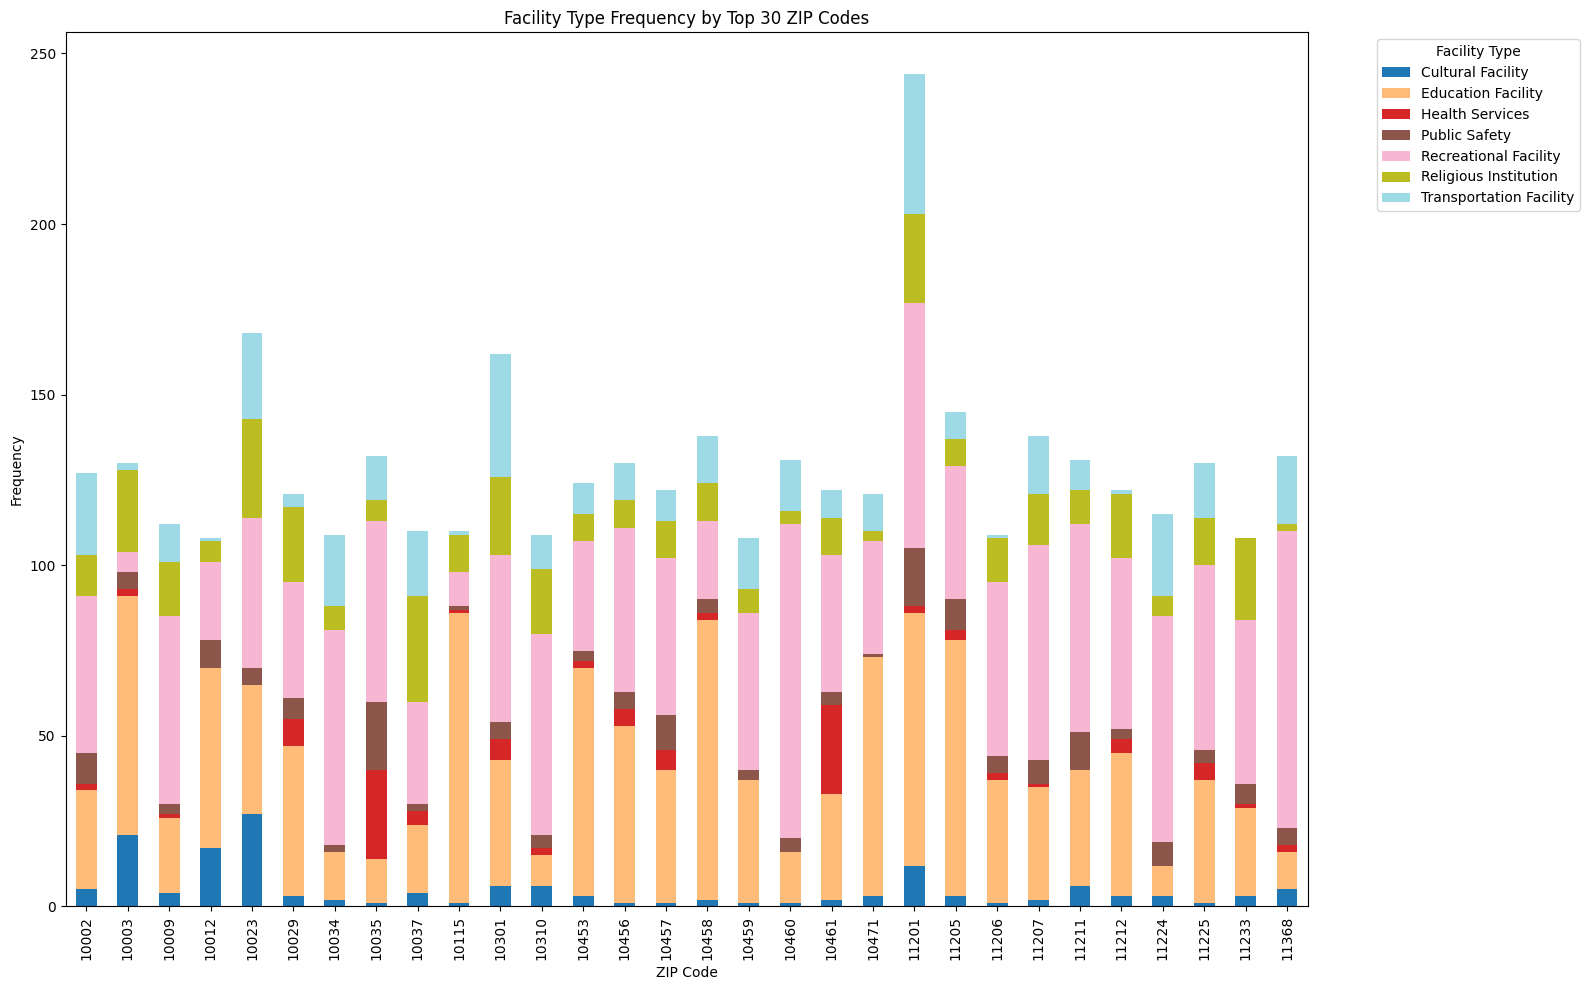

In [99]:
grouped_data = pd.read_csv('cleaned_amenities.csv')

# Aggregate 
aggregated_data = grouped_data.groupby(['ZIP_CODE', 'FACILITY_T'])['COUNT'].sum().reset_index()

# Filter
top_zip_codes = aggregated_data.groupby('ZIP_CODE')['COUNT'].sum().nlargest(30).index
top_aggregated_data = aggregated_data[aggregated_data['ZIP_CODE'].isin(top_zip_codes)]

# Pivot 
pivot_data = top_aggregated_data.pivot(index='ZIP_CODE', columns='FACILITY_T', values='COUNT').fillna(0)

# Plot 
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))

plt.title('Facility Type Frequency by Top 30 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency')
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [103]:
facility_data = pd.read_csv('cleaned_amenities.csv')
zipcode_data = pd.read_csv('us_zip_codes')

# Define a function to calculate the Manhattan distance
def manhattan_distance(lat1, lon1, lat2, lon2):
    return np.abs(lat1 - lat2) + np.abs(lon1 - lon2)

# Convert the data to NumPy arrays for efficient computation
facility_lats = facility_data['LAT'].values
facility_lngs = facility_data['LNG'].values
zipcode_lats = zipcode_data['LAT'].values
zipcode_lngs = zipcode_data['LNG'].values

# Calculate distances in a vectorized manner
distances = np.zeros(len(facility_data))

for i in range(len(facility_data)):
    distances[i] = np.min(manhattan_distance(facility_lats[i], facility_lngs[i], zipcode_lats, zipcode_lngs))

# Convert distances from degrees to kilometers (approximate conversion factor)
distances_km = distances * 111  # Average degrees to kilometers conversion

# Add the distances to the facility_data DataFrame
facility_data['DISTANCE_TO_FACILITY'] = distances_km

facility_data

,BOROUGH,ZIP_CODE,LNG,LAT,FACILITY_T,COUNT,DISTANCE_TO_FACILITY
0,Bronx,10033,-73.927973,40.845437,Transportation Facility,1,1.234077
1,Bronx,10033,-73.927467,40.845896,Recreational Facility,1,1.239291
2,Bronx,10033,-73.927065,40.846496,Transportation Facility,1,1.217330
3,Bronx,10033,-73.926883,40.846434,Transportation Facility,1,1.244448
4,Bronx,10034,-73.922361,40.880630,Transportation Facility,1,1.720989
...,...,...,...,...,...,...,...
12818,Staten Island,10314,-74.140036,40.602510,Religious Institution,1,3.214461
12819,Staten Island,11425,-74.044297,40.606597,Transportation Facility,1,2.388385
12820,Staten Island,11425,-74.044204,40.606655,Transportation Facility,1,2.371632
12821,Staten Island,11425,-74.044114,40.606685,Transportation Facility,1,2.358367


In [104]:
facility_data.rename(columns={'FACILITY_T': 'FACILITY_TYPE'}, inplace=True)

In [105]:
# Save the updated facility data with the new column
facility_data.to_csv('cleaned_amenities_with_distances.csv', index=False)

<Figure size 1400x800 with 0 Axes>

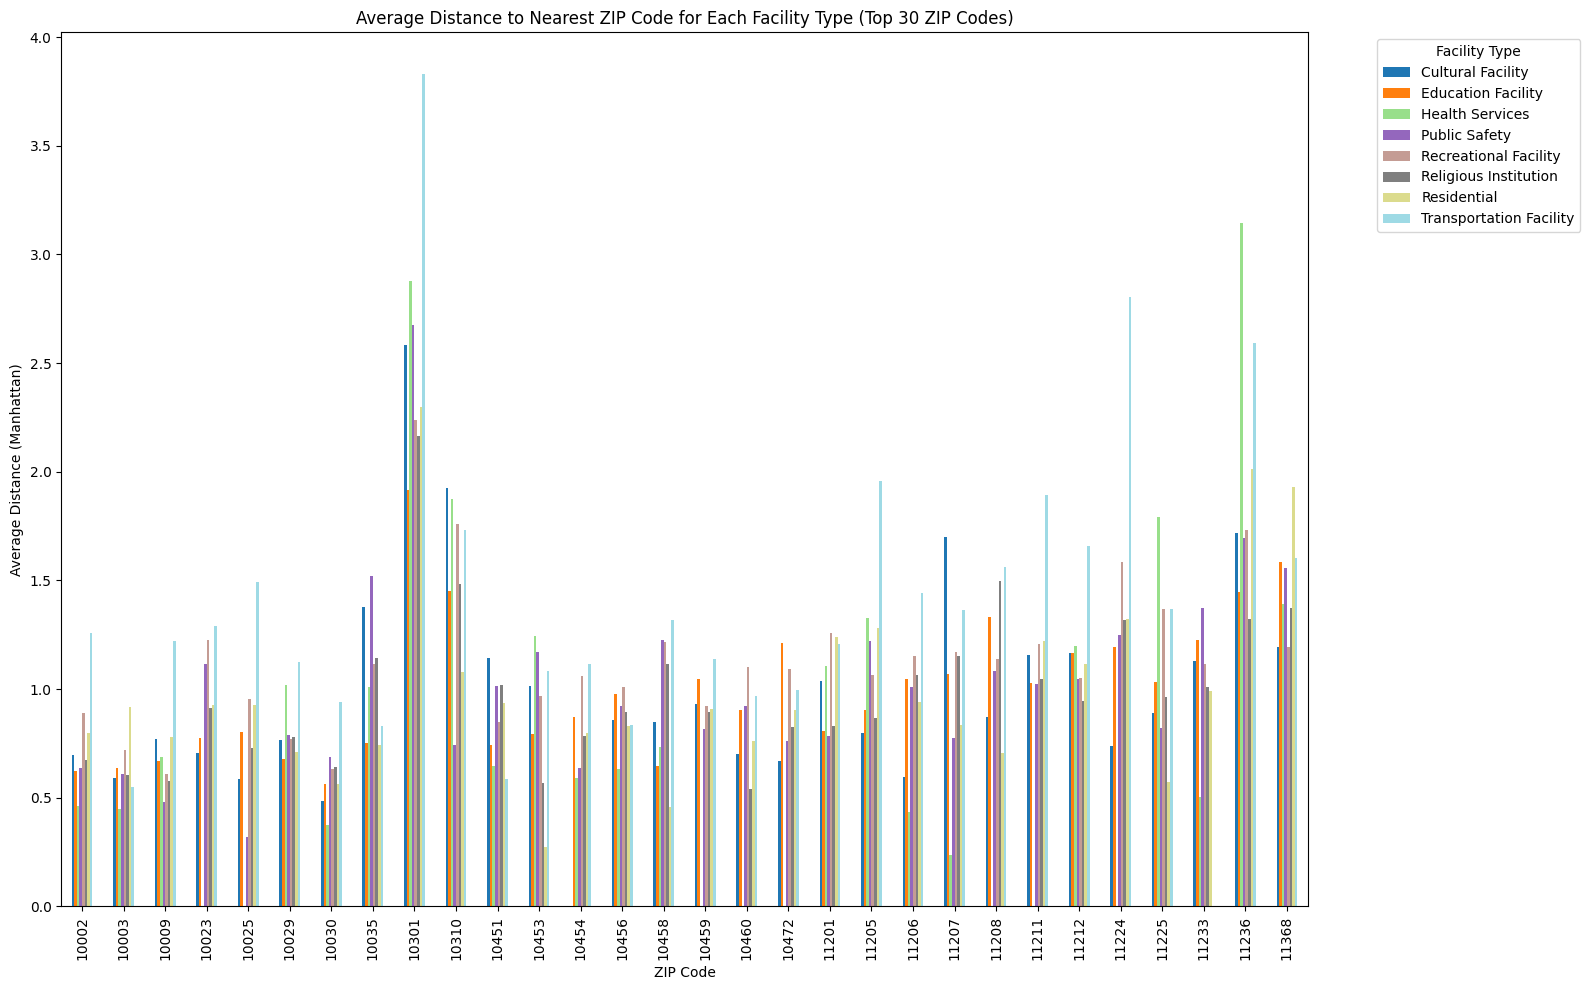

In [17]:
import matplotlib.pyplot as plt

facility_data = pd.read_csv('cleaned_amenities_with_distances.csv')

# Calculate the average distance for each facility type by ZIP_CODE
average_distances = facility_data.groupby(['ZIP_CODE', 'FACILITY_T'])['DISTANCE_TO_FACILITY'].mean().reset_index()

top_zip_codes = facility_data['ZIP_CODE'].value_counts().nlargest(30).index

# Filter
top_average_distances = average_distances[average_distances['ZIP_CODE'].isin(top_zip_codes)]

# Pivot the data 
pivot_data = top_average_distances.pivot(index='ZIP_CODE', columns='FACILITY_T', values='DISTANCE_TO_FACILITY').fillna(0)

# Plot 
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', colormap='tab20', figsize=(16, 10))

plt.title('Average Distance to Nearest ZIP Code for Each Facility Type (Top 30 ZIP Codes)')
plt.xlabel('ZIP Code')
plt.ylabel('Average Distance (km)')
plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

## Save to json

In [106]:
# Load
grouped_data = pd.read_csv('cleaned_amenities_with_distances.csv')

# Convert to json
json_path = 'cleaned_amenities_with_distances.json'
grouped_data.to_json(json_path, orient='records', lines=True)